In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely.geometry

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

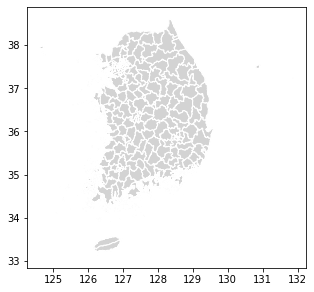

In [3]:
gdf = gpd.GeoDataFrame.from_file("DATA/ADM_KOR.gpkg")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
gdf.plot(ax=ax, color='lightgray', edgecolor='white');

In [4]:
len(gdf) # 행정구역 개수

229

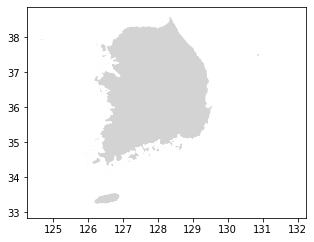

In [5]:
# 합집합(union) 도형
polygon = gdf['geometry'].unary_union
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
gpd.GeoSeries(polygon).plot(ax=ax, color='lightgray', edgecolor='white');

In [6]:
len(polygon) # 폴리곤 개수

1306

In [7]:
polygon.bounds # 폴리곤 영역

(124.60971767800004, 33.11235576000007, 131.87146666600006, 38.61177289700004)

In [8]:
min_x, min_y, max_x, max_y = polygon.bounds # 폴리곤 영역

In [9]:
np.random.uniform(-1,1,10) # 무작위 표본 추출

array([-0.55710053, -0.13715107, -0.87707793,  0.60601546, -0.94459007,
       -0.03499846,  0.17941559, -0.3516399 ,  0.91227461, -0.64557083])

In [10]:
size = 100 # 포인트 개수
overestimate = 2 # 과대 산정
ratio = polygon.area / polygon.envelope.area # 면적 비율 = 폴리곤 면적 / 경계상자 면적

In [11]:
samples = np.random.uniform((min_x, min_y), (max_x, max_y), (int(size / ratio * overestimate), 2))
multipoint = shapely.geometry.MultiPoint(samples)

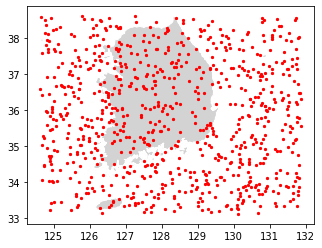

In [12]:
base = gpd.GeoSeries(polygon).plot(color='lightgray', edgecolor='white')
gpd.GeoSeries(multipoint).plot(ax=base, marker='o', color='red', markersize=5);

In [13]:
len(multipoint) # 멀티포인트 개수

790

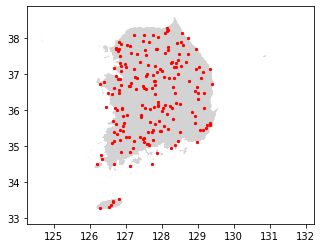

In [14]:
multipoint = multipoint.intersection(polygon)
base = gpd.GeoSeries(polygon).plot(color='lightgray', edgecolor='white')
gpd.GeoSeries(multipoint).plot(ax=base, marker='o', color='red', markersize=5);

In [15]:
samples = np.array(multipoint)
len(samples) # 멀티포인트 개수

192

In [16]:
df = pd.DataFrame(samples[np.random.choice(len(samples), size)])
df.columns = ['lon', 'lat']
gdf_pt = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf_pt.head()

,lon,lat,geometry
0,127.946997,37.152321,POINT (127.94700 37.15232)
1,126.187392,34.509314,POINT (126.18739 34.50931)
2,129.338937,35.630554,POINT (129.33894 35.63055)
3,128.980471,36.654300,POINT (128.98047 36.65430)
4,127.537261,36.055660,POINT (127.53726 36.05566)


In [17]:
from shapely.geometry import Point

# 단일 폴리곤에서 무작위 표본 추출
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points

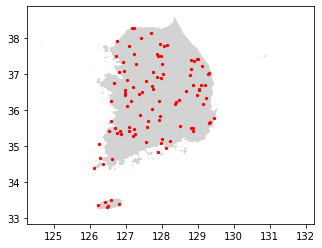

In [18]:
polygon = gdf['geometry'].unary_union
samples = random_points_in_polygon(size, polygon)
multipoint = shapely.geometry.MultiPoint(samples)
base = gpd.GeoSeries(polygon).plot(color='lightgray', edgecolor='white')
gpd.GeoSeries(multipoint).plot(ax=base, marker='o', color='red', markersize=5);

In [19]:
# 지오시리즈에서 무작위 표본 추출
def sample_geoseries(geoseries, size, overestimate=2):
    polygon = geoseries.unary_union
    min_x, min_y, max_x, max_y = polygon.bounds
    ratio = polygon.area / polygon.envelope.area
    samples = np.random.uniform((min_x, min_y), (max_x, max_y), (int(size / ratio * overestimate), 2))
    multipoint = shapely.geometry.MultiPoint(samples)
    multipoint = multipoint.intersection(polygon)
    samples = np.array(multipoint)
    while samples.shape[0] < size:
        samples = np.concatenate([samples, random_points_in_polygon(size, polygon)])
    return samples[np.random.choice(len(samples), size)]

In [20]:
points = sample_geoseries(gdf['geometry'], 100)
df = pd.DataFrame(points)
df.columns = ['lon', 'lat']
gdf_pt = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf_pt.head()

,lon,lat,geometry
0,127.357580,37.741575,POINT (127.35758 37.74157)
1,129.205882,35.254111,POINT (129.20588 35.25411)
2,128.459970,38.073333,POINT (128.45997 38.07333)
3,128.279235,38.284742,POINT (128.27923 38.28474)
4,127.064685,36.243761,POINT (127.06468 36.24376)


In [21]:
def random_points_in_gdf(gdf, size, overestimate=2):
    polygon = gdf['geometry'].unary_union
    min_x, min_y, max_x, max_y = polygon.bounds
    ratio = polygon.area / polygon.envelope.area
    samples = np.random.uniform((min_x, min_y), (max_x, max_y), (int(size / ratio * overestimate), 2))
    multipoint = shapely.geometry.MultiPoint(samples)
    multipoint = multipoint.intersection(polygon)
    samples = np.array(multipoint)
    points = samples[np.random.choice(len(samples), size)]
    df = pd.DataFrame(points, columns=['lon', 'lat'])
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

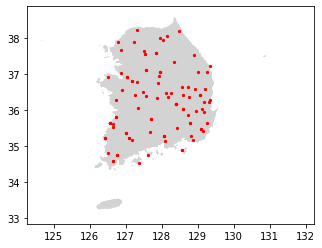

In [22]:
base = gpd.GeoSeries(polygon).plot(color='lightgray', edgecolor='white')
gdf_pt = random_points_in_gdf(gdf, 100)
gdf_pt.plot(ax=base, marker='o', color='red', markersize=5);